<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Admission 데이터로 모델링합니다.
- Logistic Regression 알고리즘으로 모델링합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기초통계량 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [5]:
# 범주값 개수 확인
data['ADMIT'].value_counts()

0    282
1    218
Name: ADMIT, dtype: int64

In [6]:
# 상관관계 확인
data.corr()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.701671
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.680503
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618367
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.606876
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.536527
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.752196
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.503104
ADMIT,0.701671,0.680503,0.618367,0.606876,0.536527,0.752196,0.503104,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [7]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [8]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.

In [11]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# 2단계: 선언하기
model = LogisticRegression(max_iter=500)

In [15]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [16]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [17]:
# 5단계 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  5]
 [ 8 59]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        83
           1       0.92      0.88      0.90        67

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



# 5.모델 들여다 보기

- 모델을 좀 더 살펴보면서 Logistic Regression 개념을 확인해 봅니다.
- 우선 가중치와 편향을 확인합니다.

In [18]:
# 가중치, 편향 확인
print(model.coef_)
print(model.intercept_)

[[0.06928607 0.08822157 0.32018202 0.47764448 0.31398866 2.50292726
  0.65473808]]
[-57.53286188]


- 위 가중치와 편향으로 작성된 회귀식의 결괏값 z를 확인합니다.

$$\large z=w_1x_1+w_2x_2+w_3x_3+w_4x_4+w_5x_5+w_6x_6+w_7x_7+w_0$$

- 모델의 decision_function 메소드를 사용해 쉽게 확인할 수 있습니다.

In [20]:
# z값 확인
z = model.decision_function(x_test)
print(z[:10].round(2))

[ 1.95 -2.27  6.14  3.04  4.3  -3.54 -4.9   6.46  5.99 -2.55]


- 위 z 값을 로지스틱 함수(=sigmoid 함수)에 전달해 확률값 p를 확인합니다.

$$\large p=\frac{1}{1-e^{-z}}$$

In [22]:
# sigmoid 함수 값 확인
from scipy.special import expit

# 확률값 확인
expit(z)[:10].round(2)

array([0.88, 0.09, 1.  , 0.95, 0.99, 0.03, 0.01, 1.  , 1.  , 0.07])

- 확률값 p는 모델의 predict_proba 메소드로 확인할 수도 있습니다.

In [23]:
# p값 확인
p = model.predict_proba(x_test)
print(p[:10].round(2))

[[0.12 0.88]
 [0.91 0.09]
 [0.   1.  ]
 [0.05 0.95]
 [0.01 0.99]
 [0.97 0.03]
 [0.99 0.01]
 [0.   1.  ]
 [0.   1.  ]
 [0.93 0.07]]


- p 값으로 확인된 0의 확률값, 1의 확률값 중 큰 값의 인덱스를 확인합니다.
- 이 인덱스 값이 0, 1 과 같은 값입니다.

In [25]:
# 확률이 큰 값의 인덱스 확인
print(p[:10].argmax(axis=1))

[1 0 1 1 1 0 0 1 1 0]


- 당연히 실제 예측값 y_pred 값이 위 값과 같습니다.

In [27]:
# 예측 결과 확인
print(y_pred[:10])

[1 0 1 1 1 0 0 1 1 0]


- p값을 시각화해 확인합니다.

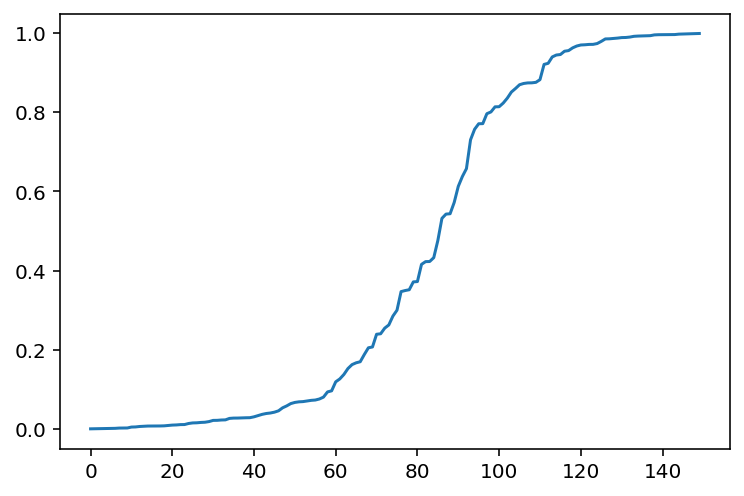

In [33]:
# 데이터프레임 만들기
df = pd.DataFrame(p)
tmp = df.sort_values(by=1)
tmp.reset_index(drop=True, inplace=True)

# 시각화
tmp[1].plot()
plt.show()